The dataset consist of three classes of irises. The objective is to create a classifier that will predict whether an iris belongs to the 'Iris-setosa'class or not. 

In [55]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [56]:
# Task 2 - Read in the data set

# # Load the Iris dataset from CSV,the first column used as the index for the DataFrame.
df= pd.read_csv("iris.csv", index_col=0)

# check the first 5 rows of the dataset
df.head(5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [57]:
df.tail(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica
149,6.2,3.4,5.4,2.3,Iris-virginica
150,5.9,3.0,5.1,1.8,Iris-virginica


In [58]:
df.shape

(150, 5)

In [59]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [60]:
df.info

<bound method DataFrame.info of      SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm         Species
Id                                                                           
1              5.1           3.5            1.4           0.2     Iris-setosa
2              4.9           3.0            1.4           0.2     Iris-setosa
3              4.7           3.2            1.3           0.2     Iris-setosa
4              4.6           3.1            1.5           0.2     Iris-setosa
5              5.0           3.6            1.4           0.2     Iris-setosa
..             ...           ...            ...           ...             ...
146            6.7           3.0            5.2           2.3  Iris-virginica
147            6.3           2.5            5.0           1.9  Iris-virginica
148            6.5           3.0            5.2           2.0  Iris-virginica
149            6.2           3.4            5.4           2.3  Iris-virginica
150            5.9           3.0

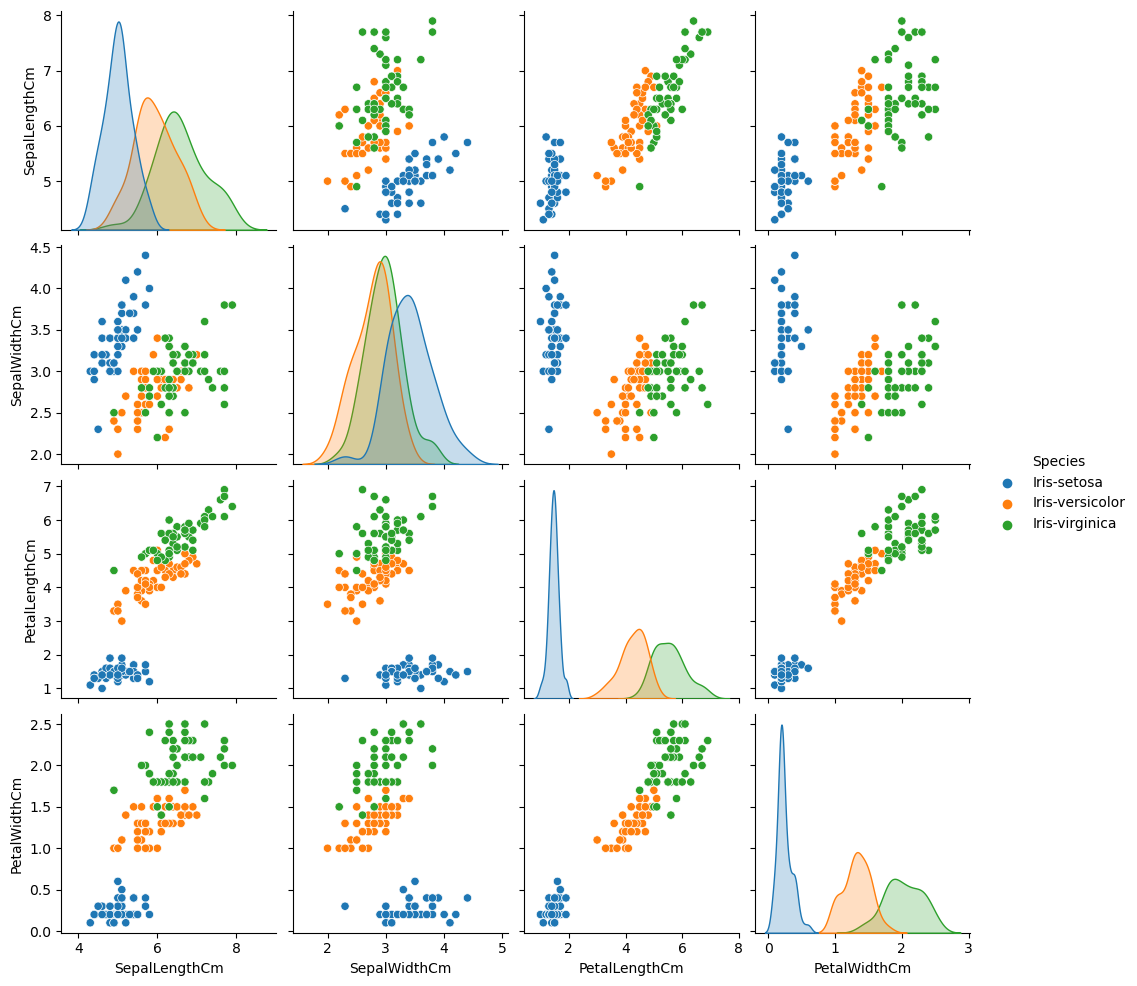

In [61]:
# Visualise the dataset using pair plots
sns.pairplot(df, hue='Species')
plt.show()

Task 2- Identify the independent variables of the dataset.

In [63]:
# Identify independent variables
independent_variables = df.columns[:-1]

# Display the independent variables
print("Independent Variables:")
print(independent_variables)

Independent Variables:
Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


In [64]:
# Extract independent variables
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

# Apply Min-Max scaling to independent variables
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Display the scaled independent variables
print("Independent Variables:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())

Independent Variables:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0       0.222222      0.625000       0.067797      0.041667
1       0.166667      0.416667       0.067797      0.041667
2       0.111111      0.500000       0.050847      0.041667
3       0.083333      0.458333       0.084746      0.041667
4       0.194444      0.666667       0.067797      0.041667


In [65]:
# Identify the dependent variable
dependent_variable = df.columns[-1]

# Display the dependent variable
print("Dependent Variable:")
print(dependent_variable)

Dependent Variable:
Species


Task 3 - Encode the dependant variable y such that 'Iris-setosa' is encoded as 0, and 'Iris-versicolor' and Iris-virginica' are both encoded as 1
( 0 corresponds to the 'Iris-setosa' class, and 1 correspods to the 'not-'Iris-setosa' class

In [66]:
# Encode the dependent variable
df['EncodedSpecies'] = df['Species'].apply(lambda x: 0 if x == 'Iris-setosa' else 1)

# Display the updated DataFrame
print("Updated DataFrame:")
print(df.head())

Updated DataFrame:
    SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species  \
Id                                                                          
1             5.1           3.5            1.4           0.2  Iris-setosa   
2             4.9           3.0            1.4           0.2  Iris-setosa   
3             4.7           3.2            1.3           0.2  Iris-setosa   
4             4.6           3.1            1.5           0.2  Iris-setosa   
5             5.0           3.6            1.4           0.2  Iris-setosa   

    EncodedSpecies  
Id                  
1                0  
2                0  
3                0  
4                0  
5                0  


Task 4 - Split the dataset into training and test set

In [67]:
# Extract features (independent variables) and target variable
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['EncodedSpecies']  # Assuming 'EncodedSpecies' was created in the previous steps

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shapes - X_train: {}, y_train: {}".format(X_train.shape, y_train.shape))
print("Test set shapes - X_test: {}, y_test: {}".format(X_test.shape, y_test.shape))

Training set shapes - X_train: (120, 4), y_train: (120,)
Test set shapes - X_test: (30, 4), y_test: (30,)


Use sklearn;s logistic regression function to fit a model and make predicted labels on the test set

In [68]:
# Initialise the logistic regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Fit the model on the training set
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Display accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

Accuracy on the test set: 100.00%


An accuracy of 100.00% on the test set might indicate that the logistic regression model is overfitting the data.

In [69]:
# Lets investigate further
from sklearn.metrics import confusion_matrix, classification_report

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Display classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[10  0]
 [ 0 20]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



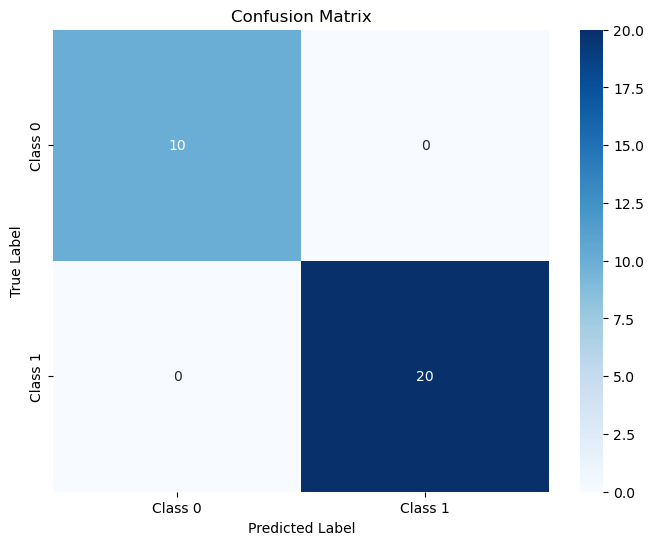


Metrics:
Accuracy: 1.00
Precision - Class 0: 1.00
Precision - Class 1: 1.00
Recall - Class 0: 1.00
Recall - Class 1: 1.00


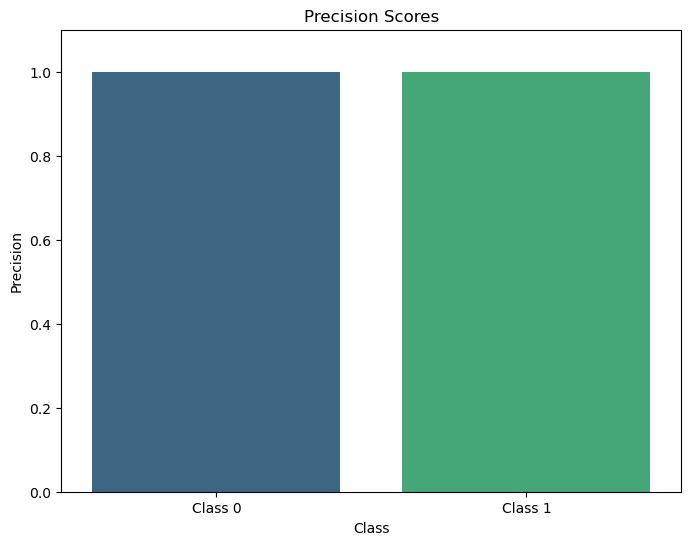


Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         1
     Class 1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [70]:
# Given confusion matrix
conf_matrix = np.array([[10, 0], [0, 20]])

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Calculate and display accuracy, precision, and recall
accuracy = np.sum(np.diagonal(conf_matrix)) / np.sum(conf_matrix)
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)

print("\nMetrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision - Class 0: {precision[0]:.2f}")
print(f"Precision - Class 1: {precision[1]:.2f}")
print(f"Recall - Class 0: {recall[0]:.2f}")
print(f"Recall - Class 1: {recall[1]:.2f}")

# Visualize precision scores
precision_scores = [precision[0], precision[1]]
classes = ['Class 0', 'Class 1']

plt.figure(figsize=(8, 6))
sns.barplot(x=classes, y=precision_scores, palette='viridis')
plt.title('Precision Scores')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.ylim(0, 1.1)
plt.show()

# Display classification report
report = classification_report(np.argmax(conf_matrix, axis=1), np.argmax(conf_matrix, axis=0), target_names=['Class 0', 'Class 1'])
print("\nClassification Report:")
print(report)

The model achieved 100% accuracy, precision, recall, and F1-score on both classes.
The results suggest that the model is performing extremely well on this specific dataset.

In [71]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(logistic_regression_model, X, y, cv=5)
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [1. 1. 1. 1. 1.]


In [72]:
misclassified_indices = y_test[y_test != y_pred].index
misclassified_instances = df.loc[misclassified_indices, :]
print("Misclassified Instances:")
print(misclassified_instances)

Misclassified Instances:
Empty DataFrame
Columns: [SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species, EncodedSpecies]
Index: []


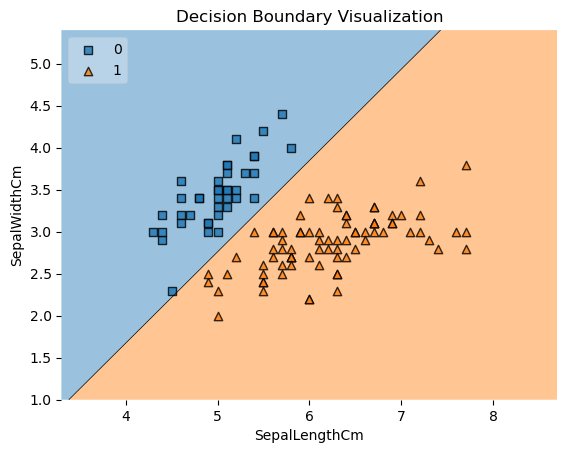

In [73]:
from mlxtend.plotting import plot_decision_regions

# Assuming you have only two features for simplicity
features = ['SepalLengthCm', 'SepalWidthCm']
X_visualize = X_train[features].values
logistic_regression_model.fit(X_visualize, y_train)

# Plot decision boundary
plot_decision_regions(X_visualize, y_train.values, clf=logistic_regression_model, legend=2)
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.title("Decision Boundary Visualization")
plt.show()

Task 5 - Use sklearn to generate a confusion matrix, which compares the predicted labels to the actual labels (gold labels)

In [74]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the logistic regression model
logistic_regression_model = LogisticRegression(random_state=42)

# Fit the model on the training set
logistic_regression_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10  0]
 [ 0 20]]


Task 6 - Analyse the confusion matrix and provide a prediction, in a comment, whether the model is likely to have higher precision, higher recall, or similar precision and recall

The top-left cell (10) represents the true negatives (TN), meaning instances of class 0 ('Iris-setosa') correctly predicted as class 0.
The bottom-right cell (20) represents the true positives (TP), meaning instances of class 1 ('not Iris-setosa') correctly predicted as class 1.
There are no instances misclassified as false positives (FP) or false negatives (FN).
True Positives (TP): 20
False Positives (FP): 0
True Negatives (TN): 10
False Negatives (FN): 0
Here, precision and recall can be calculated as follows:

Precision (P) = TP / (TP + FP) = 1.0
Recall (R) = TP / (TP + FN) = 1.0
Given that both precision and recall are 1.0 (or 100%), it indicates that the model has perfect precision and recall on the test set.
In summary, the model achieved 100% accuracy on the test set, correctly classifying all instances. This is evident from the absence of false positives and false negatives in the confusion matrix. The model is likely to have both higher precision and higher recall.

Task 7 - Write your own code to calculate the calculate the accuracy, precision, and recall, and check whether your prediction was right

In [75]:
# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

# Check whether your prediction was right
conf_matrix = confusion_matrix(y_test, y_pred)
if conf_matrix[0, 0] + conf_matrix[1, 1] == len(y_test):
    prediction_comment = "Your prediction was right! The model correctly classified all instances."
else:
    prediction_comment = "Your prediction might need further investigation. Some instances were misclassified."

# Display prediction comment
print("\nPrediction Comment:", prediction_comment)

Accuracy: 1.0
Precision: [1. 1.]
Recall: [1. 1.]

Prediction Comment: Your prediction was right! The model correctly classified all instances.


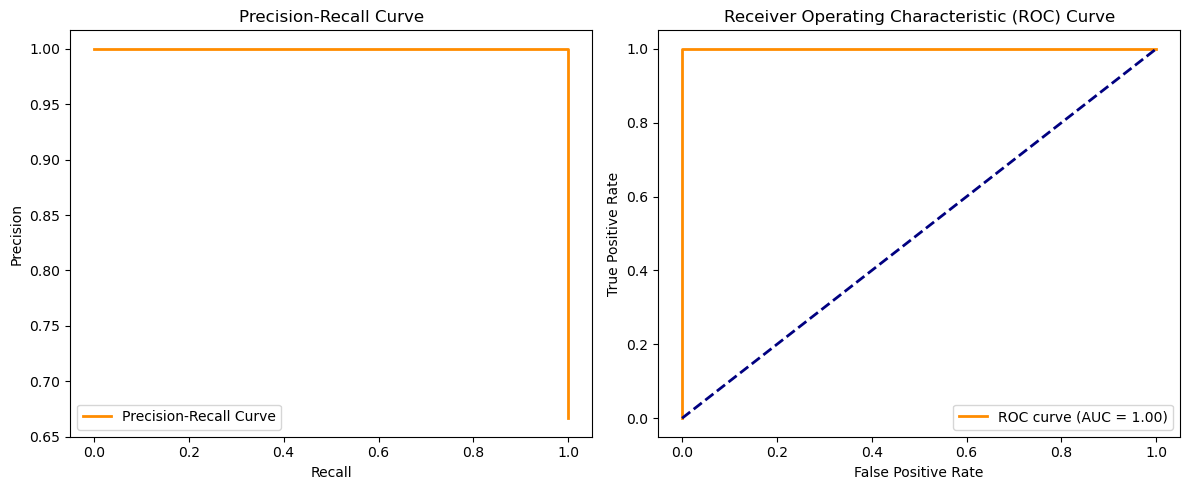

In [76]:
# lets visualise the information deper in a graph.

from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Get predicted probabilities
y_prob = logistic_regression_model.predict_proba(X_test)[:, 1]

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot Precision-Recall Curve
plt.figure(figsize=(12, 5))

# Plot Precision-Recall Curve
plt.subplot(1, 2, 1)
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

# Plot ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

plt.tight_layout()
plt.show()

Optional Task - Change so that we only have all three categories. 'Iris-setosa', 'Iris-versicolor', and 'Iris-virginica' corresponding to the numeric values 0, 1, and 2 respectively. This will now be a three-class problem. Observe how this changes the confusion matrix

In [77]:
# Encode the target variable for three classes
class_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['EncodedSpecies'] = df['Species'].map(class_mapping)

# Extract features (independent variables) and the updated target variable
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = df['EncodedSpecies']

In [78]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialise and fit the logistic regression model
logistic_regression_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Accuracy on the test set: 100.00%


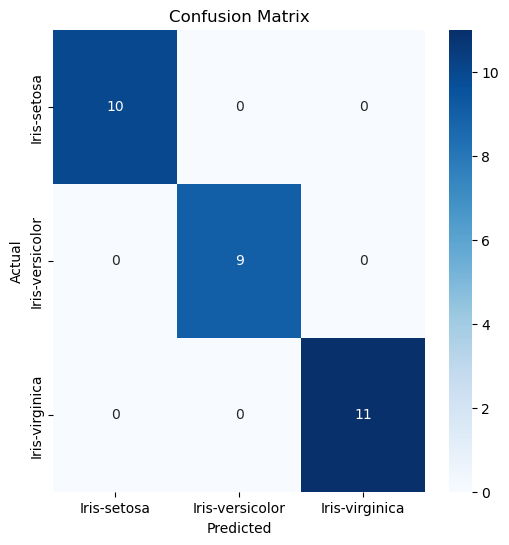

In [79]:
# Make predictions on the test set
y_pred = logistic_regression_model.predict(X_test)

# Generate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Display accuracy on the test set
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

# Visualize the confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_mapping.keys(), yticklabels=class_mapping.keys())
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

This confusion matrix suggests that the logistic regression model performed well on the test set for the three classes. Each class seems to be well-distinguished, resulting in correct predictions. The accuracy can be calculated by summing the diagonal elements and dividing by the total number of instances:

